In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.5 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow

API_KEY = "VI1yJoR4NJakTjkxhRlL"
WORKSPACE = "anno-n4jk2"
PROJECT_ID = "penyakit_daun-hr70i"
VERSION_NUM = 1

rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT_ID)
model = project.version(VERSION_NUM).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Penyakit_Daun-1 in folder:: 100%|██████████| 5010/5010 [00:00<00:00, 9642.94it/s] 


In [ ]:
# Install torchvision if needed (usually pre-installed)
!pip install torch torchvision torchaudio --quiet

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
from google.colab import files
from PIL import Image

In [ ]:
data_dir = '/content/Penyakit_Daun-1'

In [ ]:
data_dir = 'Penyakit_Daun-1'  # Adjust if using Drive
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Define class names in the order provided
class_names = ["Bercak Daun", "Bulai", "Daun Sehat", "Hawar Daun", "Karat Daun"]
num_classes = len(class_names)

In [ ]:
# Define transforms
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

valid_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_test_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=valid_test_transform)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
num_classes = 5  # ganti jika jumlah kelas berbeda

# Inisialisasi model sama seperti saat training
model = mobilenet_v3_large(weights=MobileNet_V3_Large_Weights.IMAGENET1K_V2)

# Freeze feature extractor
for param in model.parameters():
    param.requires_grad = False

# Ganti classifier
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)

# Pindah ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 98.7MB/s]


In [ ]:
num_epochs = 50
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss /= len(valid_loader)
    valid_acc = correct / total
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Valid Loss: {valid_loss:.4f}, Acc: {valid_acc:.4f}")

# Save the model
torch.save(model.state_dict(), 'mobilenetv3_leaf_disease.pth')

Epoch 1/50 - Train Loss: 0.6076, Acc: 0.8610 | Valid Loss: 0.4158, Acc: 0.9091
Epoch 2/50 - Train Loss: 0.2545, Acc: 0.9319 | Valid Loss: 0.2364, Acc: 0.9465
Epoch 3/50 - Train Loss: 0.2096, Acc: 0.9412 | Valid Loss: 0.1994, Acc: 0.9452
Epoch 4/50 - Train Loss: 0.1730, Acc: 0.9500 | Valid Loss: 0.1778, Acc: 0.9505
Epoch 5/50 - Train Loss: 0.1602, Acc: 0.9538 | Valid Loss: 0.1659, Acc: 0.9505
Epoch 6/50 - Train Loss: 0.1485, Acc: 0.9578 | Valid Loss: 0.1568, Acc: 0.9572
Epoch 7/50 - Train Loss: 0.1437, Acc: 0.9554 | Valid Loss: 0.1500, Acc: 0.9545
Epoch 8/50 - Train Loss: 0.1324, Acc: 0.9596 | Valid Loss: 0.1489, Acc: 0.9612
Epoch 9/50 - Train Loss: 0.1305, Acc: 0.9564 | Valid Loss: 0.1482, Acc: 0.9599
Epoch 10/50 - Train Loss: 0.1239, Acc: 0.9591 | Valid Loss: 0.1458, Acc: 0.9559
Epoch 11/50 - Train Loss: 0.1206, Acc: 0.9613 | Valid Loss: 0.1454, Acc: 0.9612
Epoch 12/50 - Train Loss: 0.1255, Acc: 0.9556 | Valid Loss: 0.1452, Acc: 0.9612
Epoch 13/50 - Train Loss: 0.1211, Acc: 0.9570 | V

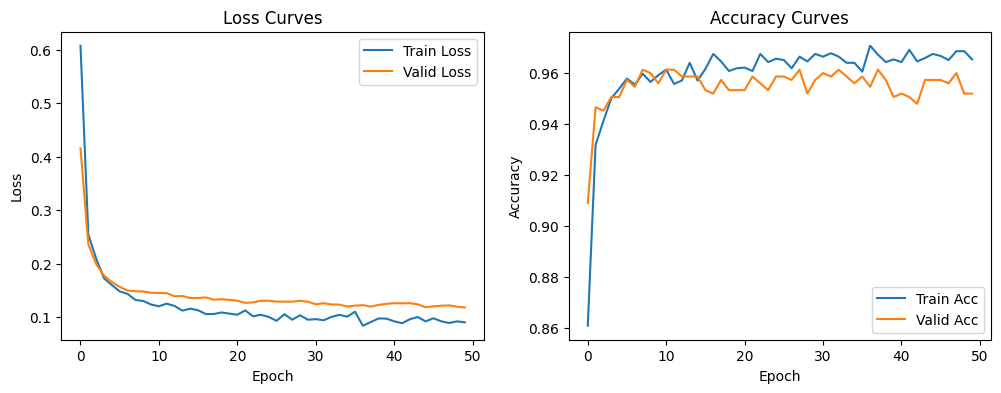

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(valid_accuracies, label='Valid Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()

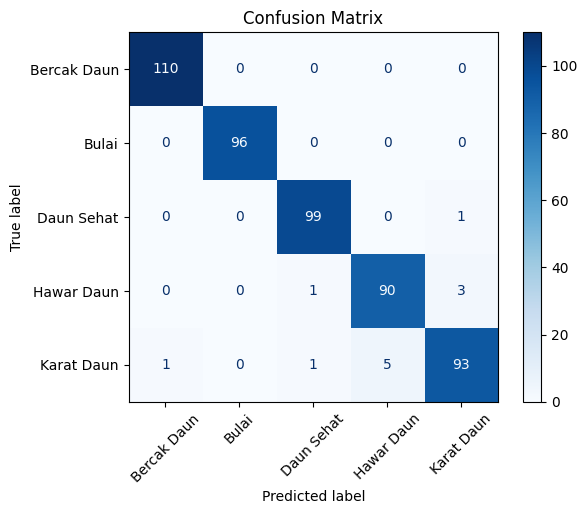

Test Accuracy: 0.9760


In [ ]:
# Test evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

# Test Accuracy
test_acc = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f"Test Accuracy: {test_acc:.4f}")

Saving IMG_20230411_060459.jpg to IMG_20230411_060459.jpg
Predicted Class: Daun Sehat


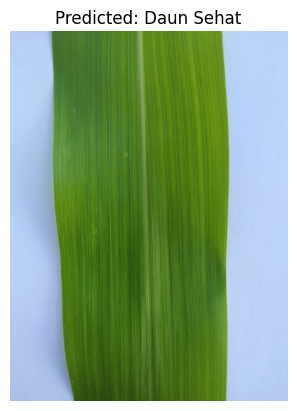

In [ ]:
# Load the saved model
model.load_state_dict(torch.load('mobilenetv3_leaf_disease.pth'))
model.eval()

# Upload image
uploaded = files.upload()  # Select an image file (e.g., .jpg)
img_path = list(uploaded.keys())[0]  # Get the filename

# Preprocess and predict
img = Image.open(img_path)
img_tensor = valid_test_transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    pred_class = class_names[predicted.item()]

print(f"Predicted Class: {pred_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()

Saving Bulai_1_png.rf.1142b7d8fe05d32f5ea9d276b639ad39.jpg to Bulai_1_png.rf.1142b7d8fe05d32f5ea9d276b639ad39.jpg
Predicted Class: Bulai


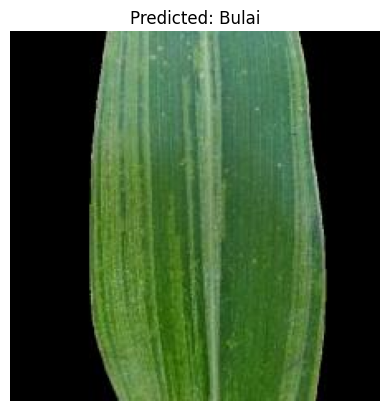

In [ ]:
# Load the saved model
model.load_state_dict(torch.load('mobilenetv3_leaf_disease.pth'))
model.eval()

# Upload image
uploaded = files.upload()  # Select an image file (e.g., .jpg)
img_path = list(uploaded.keys())[0]  # Get the filename

# Preprocess and predict
img = Image.open(img_path)
img_tensor = valid_test_transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    pred_class = class_names[predicted.item()]

print(f"Predicted Class: {pred_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()

Saving IMG_20230610_063858.jpg to IMG_20230610_063858.jpg
Predicted Class: Karat Daun


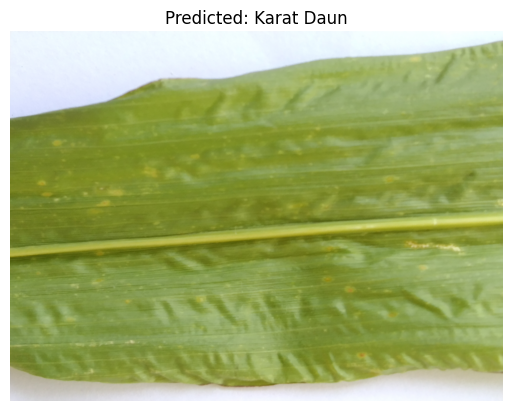

In [ ]:
# Load the saved model
model.load_state_dict(torch.load('mobilenetv3_leaf_disease.pth'))
model.eval()

# Upload image
uploaded = files.upload()  # Select an image file (e.g., .jpg)
img_path = list(uploaded.keys())[0]  # Get the filename

# Preprocess and predict
img = Image.open(img_path)
img_tensor = valid_test_transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    pred_class = class_names[predicted.item()]

print(f"Predicted Class: {pred_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()

Saving hawar.jpeg to hawar.jpeg
Predicted Class: Hawar Daun


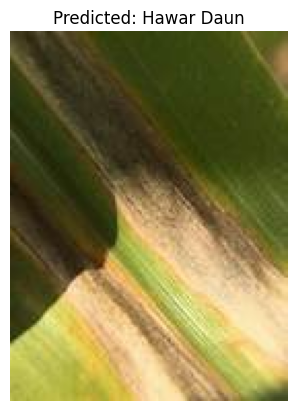

In [ ]:
# Load the saved model
model.load_state_dict(torch.load('mobilenetv3_leaf_disease.pth'))
model.eval()

# Upload image
uploaded = files.upload()  # Select an image file (e.g., .jpg)
img_path = list(uploaded.keys())[0]  # Get the filename

# Preprocess and predict
img = Image.open(img_path)
img_tensor = valid_test_transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    pred_class = class_names[predicted.item()]

print(f"Predicted Class: {pred_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()

Saving karat.jpg to karat.jpg
Predicted Class: Bercak Daun


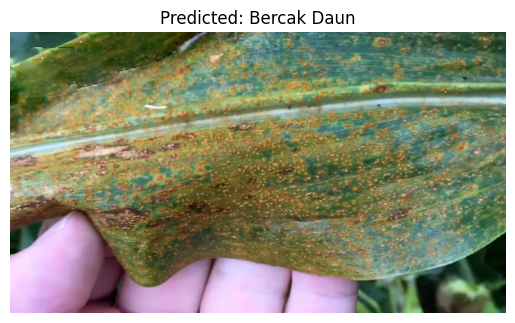

In [ ]:
# Load the saved model
model.load_state_dict(torch.load('mobilenetv3_leaf_disease.pth'))
model.eval()

# Upload image
uploaded = files.upload()  # Select an image file (e.g., .jpg)
img_path = list(uploaded.keys())[0]  # Get the filename

# Preprocess and predict
img = Image.open(img_path)
img_tensor = valid_test_transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    pred_class = class_names[predicted.item()]

print(f"Predicted Class: {pred_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()